In [9]:
!pip install pandas nltk numpy

In [10]:
import os
import numpy as np
import pandas as pd
import itertools
import collections

import nltk
from nltk import bigrams
from nltk.corpus import stopwords
import re
import networkx as nx
import matplotlib


## Reading co-occurance network

In [11]:
data = 'data/textnet_rasismi.csv'
data = open( data, encoding="utf8" ).readlines()
words_data = [ line.lower().split() for line in data ]

In [12]:
### here we would usually do a lot of language preproceessing
 # * Stemming or lemming
 # * Removing stopwords
 # * Remove common and rare words

## (not part of this course so we do not do that)

## Calculate word co-oocutance

In [13]:
terms_bigram = [list(bigrams(line)) for line in words_data ]

co_occurance = list(itertools.chain(*terms_bigram))
co_occurance_counts = collections.Counter(co_occurance)

In [14]:
G = nx.Graph()
import random

# Create connections between nodes
for words, count in co_occurance_counts.most_common( 60 ):
    G.add_edge( words[0], words[1], weight=( count * 5) )

print( G.number_of_edges() )

59


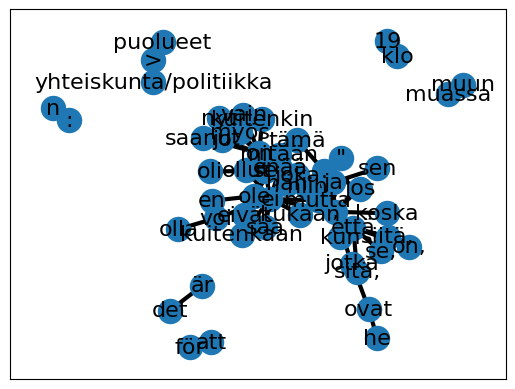

In [15]:
pos = nx.spring_layout(G, k=2)

nx.draw_networkx(G, pos,
    font_size=16,
    width=3
)